# Importing the Necessary Libraries

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix

ModuleNotFoundError: No module named 'skimpy'

# LOAD THE DATA

In [103]:
# Data loading
df=pd.read_csv("C:\\Users\\user\\Downloads\\PRCP-1003-CustTransPred\\Data\\train(1).csv")

* GOAL OF THIS PROJECT

  *     Identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided has the same structure as the real data to solve this problem., the dataset contain 200000 observation with 202 columns with 200 columns having values for var_1 to var_200, one column for ID code and one column for target

* TARGET COLUMN == TARGET [0, 1]
    
   *0 Represent -- CUSTOMER DID NOT DO A TRANSACTION
   
    *1 Represent -- CUSTOMER DID DO THE TRANSACTION 

# BASIC CHECKS

In [104]:
#First 5 rows of dataset
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [105]:
# last 5 rows of dataset
df.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [106]:
#Shape of dataset tells how many rows and cols
df.shape

(200000, 202)

In [107]:
df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

# EXAMINE THE DATA

In [71]:
#Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


# STATISTICAL SUMMARY OF DATA

In [72]:
#Statistical summary
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


# SUMMARY REPORT OF DATA

In [8]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200000 │ │ float64     │ 200   │                                                          │
│ │ Number of columns │ 202    │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean      ┃ sd       ┃ p0      ┃ p25       ┃ p50     ┃ p75     ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ target       │  0 │    0 │    0.1005 │   0.3007 │       0 │         0 │       0 │       0 │     1 │ ▇    ▁ │  │
│ │ var_0        │  0 │    0 │     10.68 │     3.04 │  0.4084 │     8.454 │   10.52 │   12.76 │ 20.32 │  ▂▇▇▃▁ │  │
│ │ var_1        │  0 │    0 │    -1.628 │     4.05 │  -15.04 │     -4.74 │  -1.608 │   1.359 │ 10.38 │  ▃▇▇▅▁ │  │
│ │ var_2        │  0 │    0 │     10.72 │    2.641 │   2.117 │     8.722 │   10.58 │   12.52 │ 19.35 │  ▃▇▇▃  │  │
│ │ var_3        │  0 │    0 │     6.797 │    2.043 │ -0.0402 │     5.254 │   6.825 │   8.324 │ 13.19 │  ▃▇▇▃  │  │
│ │ var_4        │  0 │    0 │     11.08 │    1.623 │   5.075 │     9.883 │   11.11 │   12.26 │ 16.67 │  ▂▇▇▃  │  │
│ │ var_5        │  0 │    0 │    -5.065 │    7.863 │  -32.56 │     -11.2 │  -4.833 │  0.9248 │ 17.25 │  ▂▇▇▅▁ │  │
│ │ var_6        │  0 │    0 │     5.409 │   0.8666 │   2.347 │     4.768 │   5.385 │   6.003 │ 8.448 │  ▂▇▇▂  │  │
│ │ var_7        │  0 │    0 │     16.55 │    3.418 │    5.35 │     13.94 │   16.46 │    19.1 │ 27.69 │  ▃▇▇▃  │  │
│ │ var_8        │  0 │    0 │    0.2842 │    3.333 │  -10.51 │    -2.318 │  0.3937 │   2.938 │ 10.15 │  ▃▇▇▅  │  │
│ │ var_9        │  0 │    0 │     7.567 │    1.235 │    3.97 │     6.619 │    7.63 │   8.584 │ 11.15 │ ▁▅▇▇▅  │  │
│ │ var_10       │  0 │    0 │    0.3943 │    5.501 │  -20.73 │    -3.595 │  0.4873 │   4.383 │ 18.67 │  ▁▆▇▃  │  │
│ │ var_11       │  0 │    0 │    -3.246 │     5.97 │  -26.09 │    -7.511 │  -3.287 │  0.8528 │ 17.19 │  ▂▇▇▃  │  │
│ │ var_12       │  0 │    0 │     14.02 │   0.1901 │   13.43 │     13.89 │   14.03 │   14.16 │ 14.65 │ ▁▃▇▇▃  │  │
│ │ var_13       │  0 │    0 │      8.53 │     4.64 │  -6.011 │     5.073 │   8.604 │   12.27 │ 22.33 │  ▃▇▇▅  │  │
│ │ var_14       │  0 │    0 │     7.538 │    2.248 │   1.013 │     5.782 │    7.52 │    9.27 │ 14.94 │  ▅▇▇▃  │  │
│ │ var_15       │  0 │    0 │     14.57 │   0.4117 │   13.08 │     14.26 │   14.57 │   14.87 │ 15.86 │  ▂▇▇▃  │  │
│ │ var_16       │  0 │    0 │     9.333 │    2.557 │  0.6351 │     7.452 │   9.232 │   11.06 │ 17.95 │  ▃▇▇▂  │  │
│ │ var_17       │  0 │    0 │    -5.697 │    6.713 │  -33.38 │    -10.48 │  -5.666 │ -0.8108 │ 19.03 │  ▁▇▇▃  │  │
│ │ var_18       │  0 │    0 │     15.24 │    7.851 │  -10.66 │     9.178 │    15.2 │   21.01 │ 41.75 │  ▃▇▇▃  │  │
│ │ var_19       │  0 │    0 │     12.44 │    7.997 │   -12.4 │     6.276 │   12.45 │   18.43 │ 35.18 │  ▃▇▇▅▁ │  │
│ │ var_20       │  0 │    0 │     13.29 │    5.876 │  -

* we observe that all features are numerical except ID_code column, now we have to check the distribution of target variable

# EXPLORATORY DATA ANALYSIS

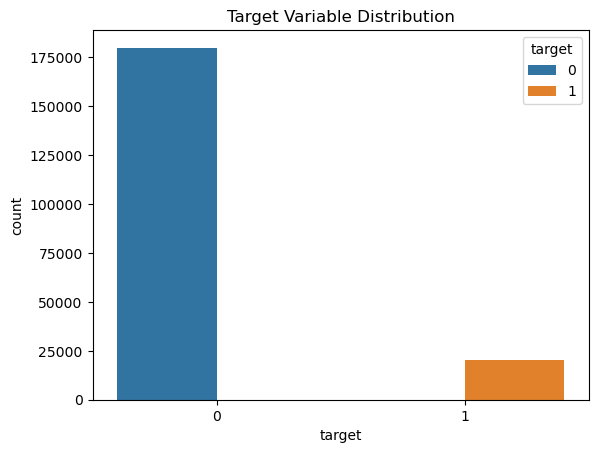

In [108]:
# Target distribution
sns.countplot(df,x=df['target'], hue="target")
plt.title("Target Variable Distribution")
plt.show()

* In this plot we are clearly seen the 90% customer are did not do a transaction and 10% customer are did do the transaction
* This target feature is imbalance so we need to balance the data with the help of SMOTE.

In [109]:
# Check exact counts
print(df['target'].value_counts(normalize=True) * 100)

target
0    89.951
1    10.049
Name: proportion, dtype: float64


* We observed that there are more 0's than 1's means the customers who does not make any transaction are more than the who 
    make a transaction
    
    so here the data is not balanced, we have to make the data balanced by using SMOTE
    

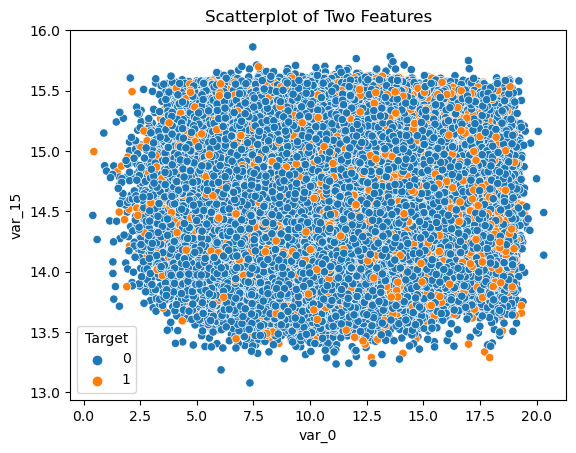

In [110]:
sns.scatterplot(df,x="var_0",y="var_15",hue="target")
plt.title("Scatterplot of Two Features")
plt.legend(title="Target")
plt.show()

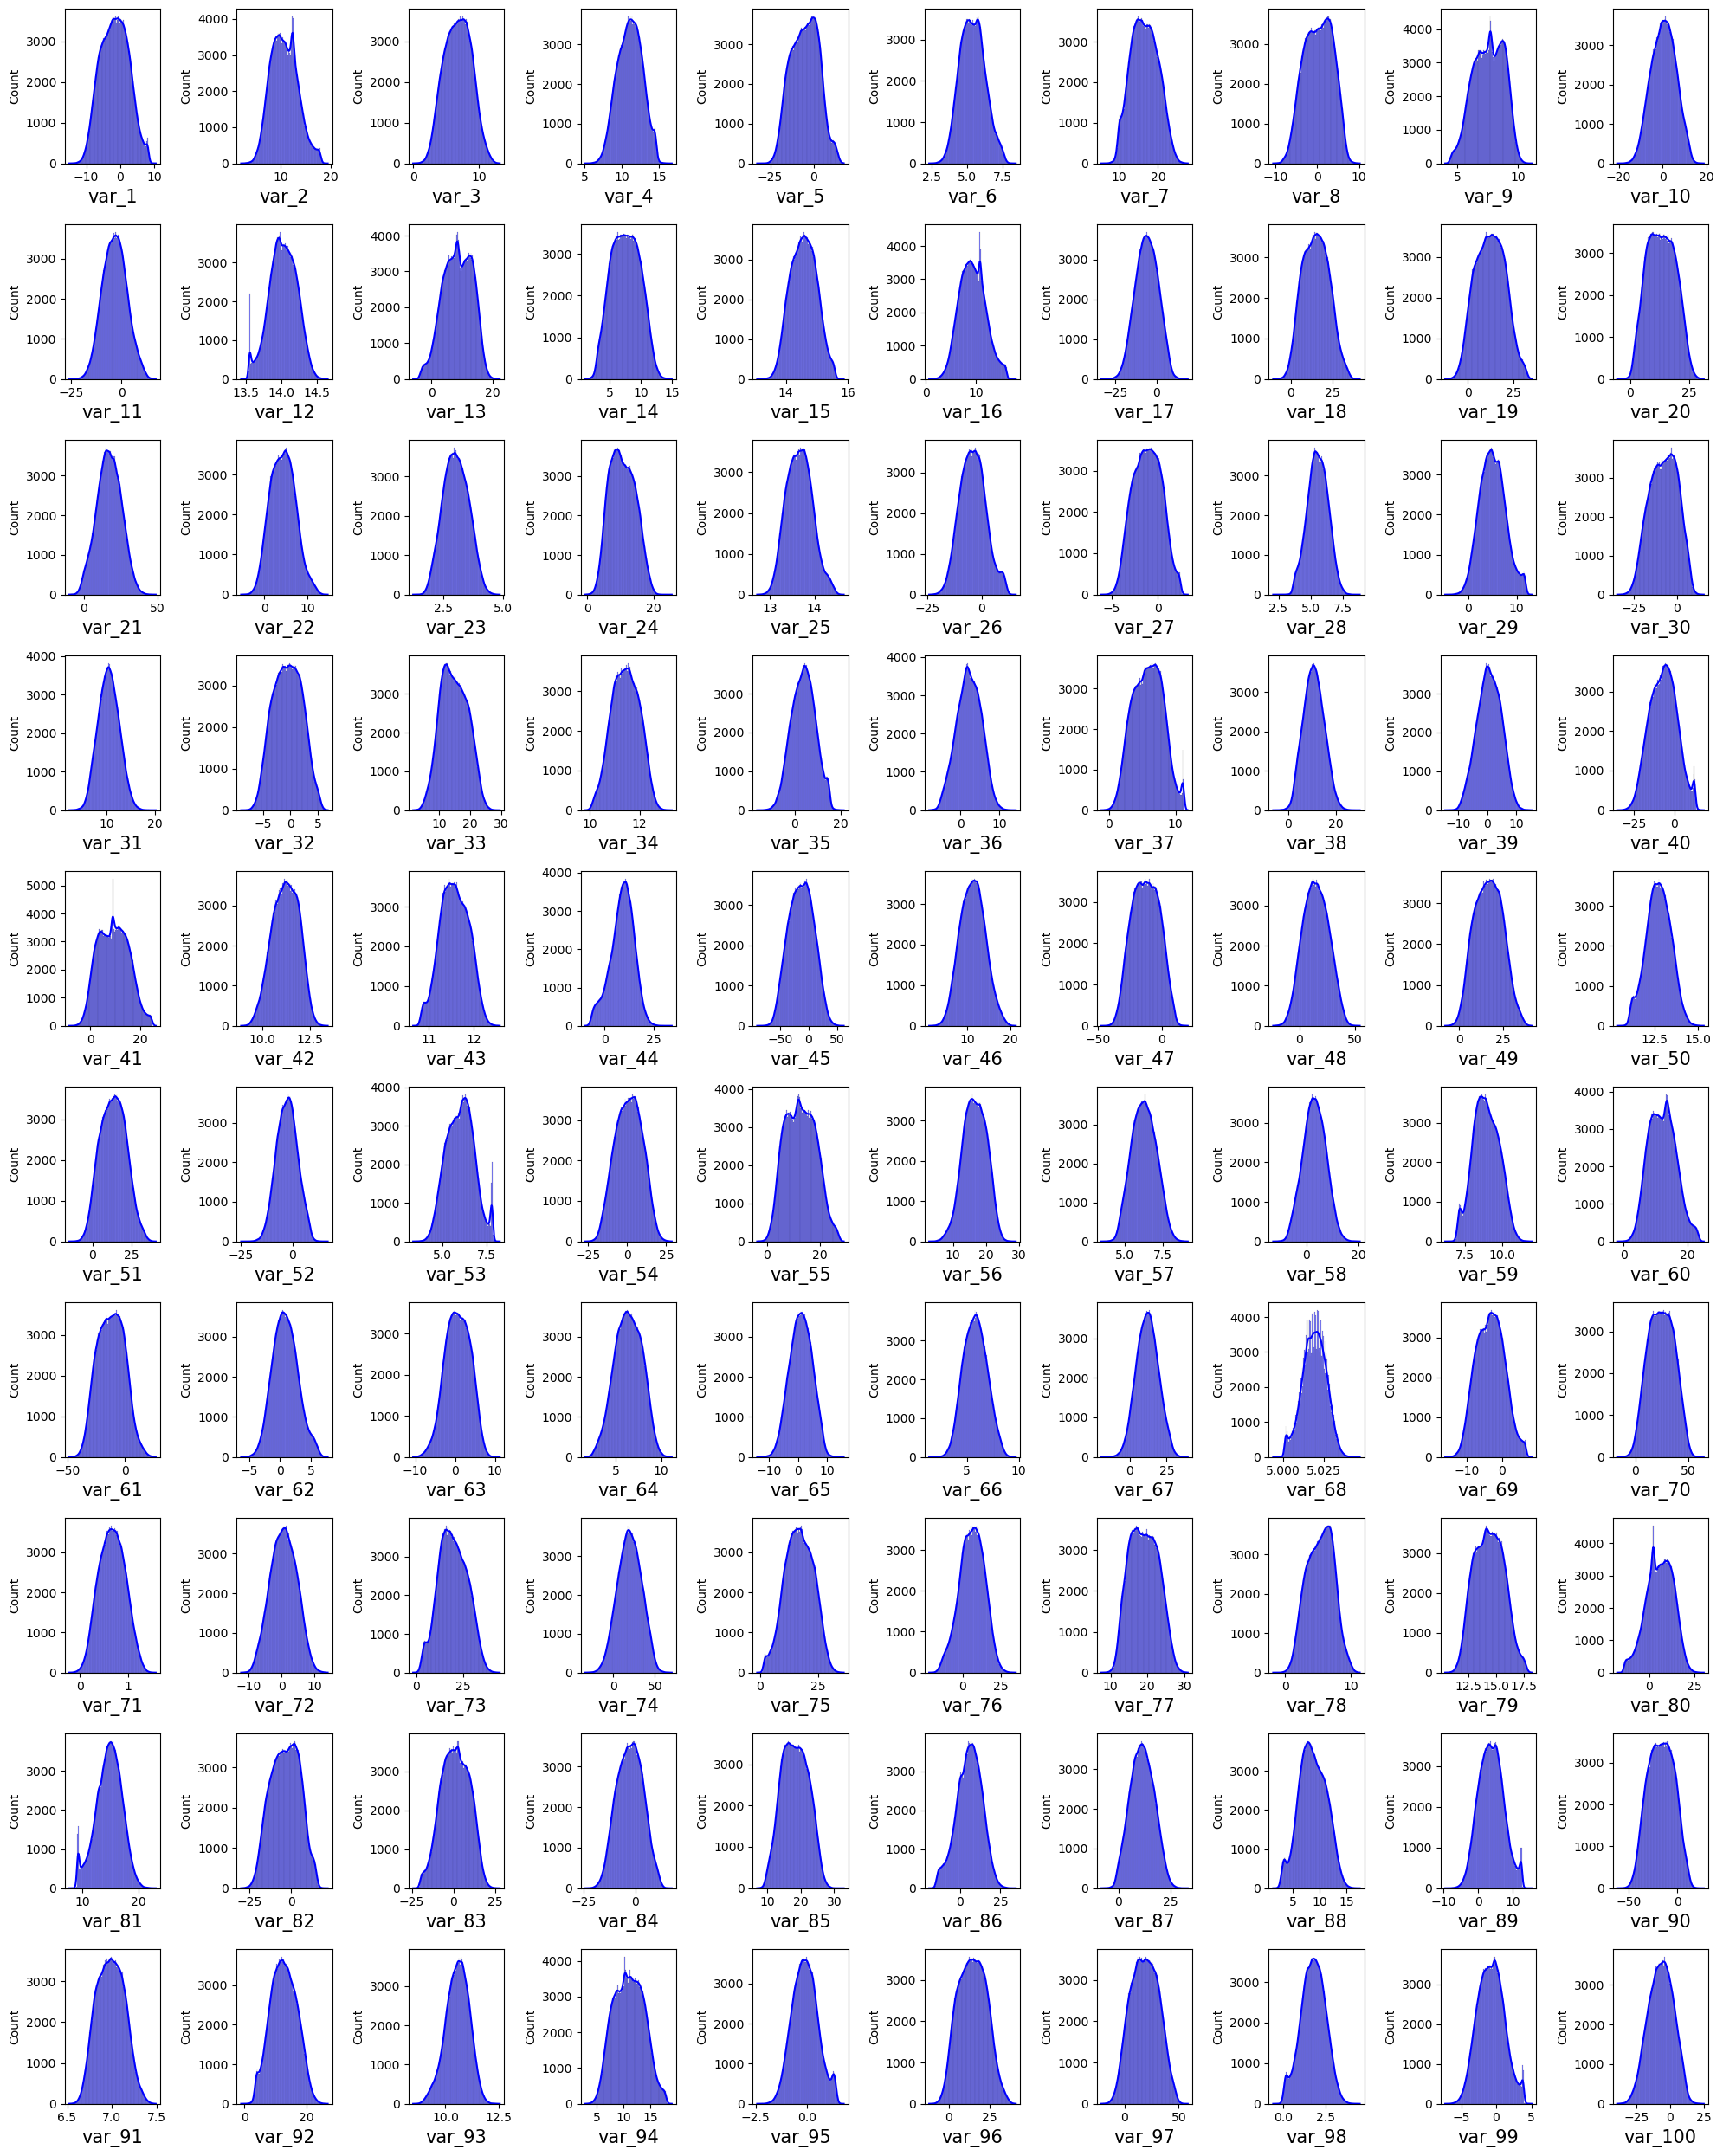

In [50]:
dist = df.iloc[:,2:102]
plt.figure(figsize=(20,25),facecolor='white') # Define canvas size
plotno = 1 # Counter
for column in dist: # Iterating the feature
    if plotno<=100: # Condition
        plt.subplot(10,10,plotno) # plotting 100 boxplot with 10 rows and 10 columns
        sns.histplot(dist[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=15) # assigning name to x-axis and font size is 20
    plotno+=1
plt.tight_layout()
plt.show() 

* From above plot we are clearly see that most of the feature is follow a normal distribution and some feature are very close to the noramal distribution so we not need to use feature transformation technique.

# DATA PREPROCESSING

# 1. Handling Missing Values

In [111]:
df.isnull().sum().sum()

0

*
In this dataset there are No missing data available

# 2. Identifying Outliers

* From the above EDA we seen the feature are very close to the normal distribution as well as distance between point is very less so we are not impute the outlier we are use scaling to robust the outlier

* ROBUST SCALING

     * Here we are using Robust scaler because the dataset contains outliers but features follows normal distribution.

In [112]:
from sklearn.preprocessing import RobustScaler # Import library
scaler = RobustScaler() # Object creation
df[df.columns[2:]]=scaler.fit_transform(df[df.columns[2:]])

In [113]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,-0.371543,-0.849081,0.350032,-0.564165,0.148216,-0.367026,-0.215656,0.420577,...,0.190533,-0.776912,0.599643,-0.303378,0.118478,-1.112383,0.643194,-0.242223,-0.744683,0.107705
1,train_1,0,0.226713,-0.416363,0.864155,-0.467749,0.527324,0.979489,0.190804,0.014925,...,0.686540,0.085795,0.331306,1.344064,-0.530228,1.103135,0.672394,-0.074077,0.571886,0.297368
2,train_2,0,-0.445003,-0.186541,0.395469,0.347815,-0.221094,-0.350556,1.260908,-0.356903,...,-0.046079,0.560891,-0.112102,-0.304303,0.764938,1.656951,-1.050161,-0.463036,-0.286149,0.200436
3,train_3,0,0.124444,-0.089159,-0.429020,0.120748,0.620850,0.247176,0.370517,-0.296912,...,0.195359,-0.598020,-0.574591,-0.351340,1.065039,-0.548868,-0.627542,1.047370,0.480670,-0.385163
4,train_4,0,-0.159803,0.020439,0.604761,-0.061074,0.491579,0.600549,0.449607,0.541684,...,-0.726076,0.499102,-0.996298,1.031426,-0.979782,-0.669600,0.178488,0.458709,0.487211,-0.373372


* we have scaled the data

# DROP THE UNIQUE FEATURE

In [114]:
# Drop ID_code column
df = df.drop('ID_code', axis=1)

In [115]:
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,-0.371543,-0.849081,0.350032,-0.564165,0.148216,-0.367026,-0.215656,0.420577,-1.011036,...,0.190533,-0.776912,0.599643,-0.303378,0.118478,-1.112383,0.643194,-0.242223,-0.744683,0.107705
1,0,0.226713,-0.416363,0.864155,-0.467749,0.527324,0.979489,0.190804,0.014925,0.523831,...,0.686540,0.085795,0.331306,1.344064,-0.530228,1.103135,0.672394,-0.074077,0.571886,0.297368
2,0,-0.445003,-0.186541,0.395469,0.347815,-0.221094,-0.350556,1.260908,-0.356903,-1.010902,...,-0.046079,0.560891,-0.112102,-0.304303,0.764938,1.656951,-1.050161,-0.463036,-0.286149,0.200436
3,0,0.124444,-0.089159,-0.429020,0.120748,0.620850,0.247176,0.370517,-0.296912,-1.190060,...,0.195359,-0.598020,-0.574591,-0.351340,1.065039,-0.548868,-0.627542,1.047370,0.480670,-0.385163
4,0,-0.159803,0.020439,0.604761,-0.061074,0.491579,0.600549,0.449607,0.541684,1.117206,...,-0.726076,0.499102,-0.996298,1.031426,-0.979782,-0.669600,0.178488,0.458709,0.487211,-0.373372


# Checking Correlation

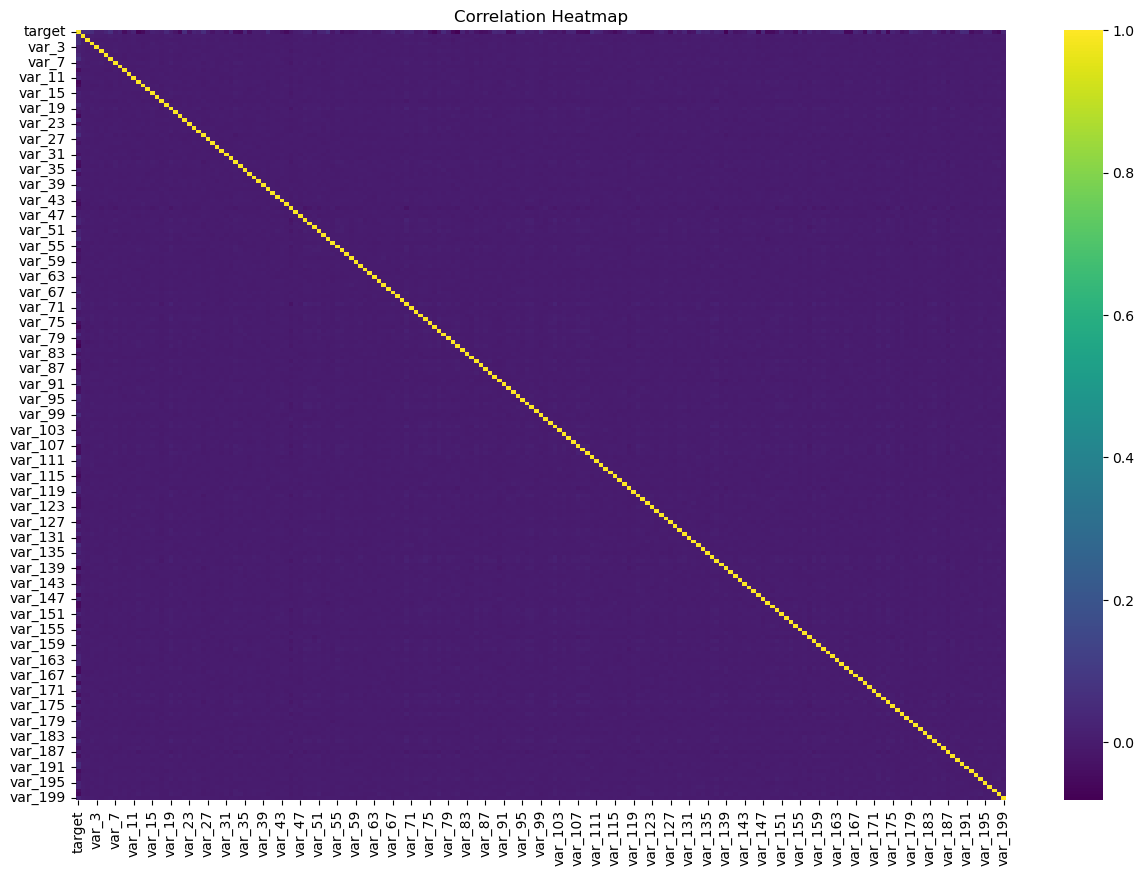

In [59]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='viridis', annot=False, cbar=True)
plt.title("Correlation Heatmap")
plt.show()


* From above heatmap scale we are clearly seen the their is no highly correlated feature in data

# 3.CHECKING DUPLICATES


In [116]:
df.duplicated().sum()

0

* there is no duplicated data in dataset

# 4. Balancing the data

In [117]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({0: 179902, 1: 20098})
balanced data:    : Counter({0: 179902, 1: 179902})


* So now the data is balanced 

# Target Distribution after applying SMOTE

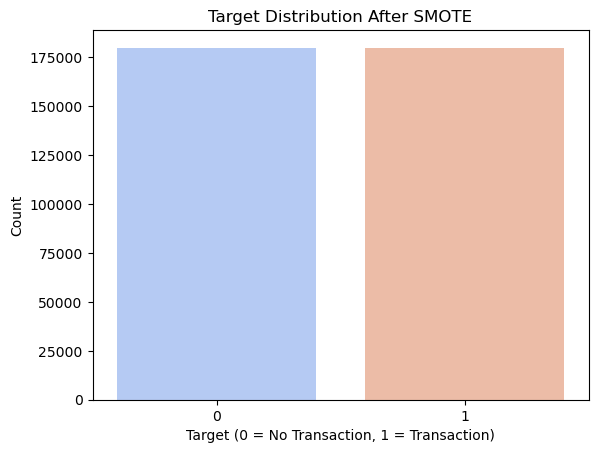

In [118]:
# Target distribution after SMOTE
from collections import Counter
counter = Counter(y_resampled)

sns.barplot(x=list(counter.keys()), y=list(counter.values()), palette='coolwarm')
plt.title("Target Distribution After SMOTE")
plt.xlabel("Target (0 = No Transaction, 1 = Transaction)")
plt.ylabel("Count")
plt.show()


# Relationship between 2 features

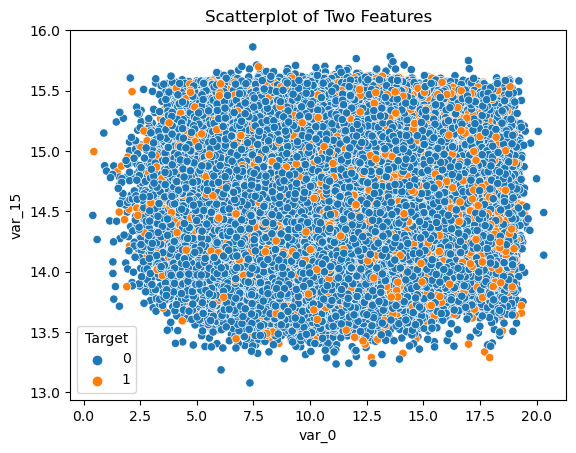

In [35]:
sns.scatterplot(df,x="var_0",y="var_15",hue="target")
plt.title("Scatterplot of Two Features")
plt.legend(title="Target")
plt.show()

# MODEL CREATION

* HERE WE WILL BE EXPERIMENTING WITH 2 ALGORITHMS
 
    * Logistic Regression
    * XGBoost Classifier

<h5>INDEPENDENT AND DEPENDENT VARIABLE CREATION

In [119]:
X = df.drop(['target'], axis=1)  # Features
y = df['target']  # Target

<h5> SPLITTING THE DATA

In [122]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3, random_state=42)

In [123]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(251862, 200)
(107942, 200)
(251862,)
(107942,)


# Logistic Regression

In [126]:
lr_model=LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)

y_pred_test=lr_model.predict(X_test)
y_pred_train=lr_model.predict(X_train)

In [130]:
# Training Accuracy
print("Logistic Regression Results:")
print("Training Accuracy: ",accuracy_score(y_pred_train,y_train))
print("\nClassification Report:")
print(classification_report(y_pred_train, y_train))

Logistic Regression Results:
Training Accuracy:  0.7994258760749935

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80    123329
           1       0.81      0.79      0.80    128533

    accuracy                           0.80    251862
   macro avg       0.80      0.80      0.80    251862
weighted avg       0.80      0.80      0.80    251862



* Logistic regression training score is very poor
  so we try another model

In [131]:
# Testing Accuracy
print("Logistic Regression Results:")
print("Testing Accuracy: ",accuracy_score(y_pred_test,y_test))
print("\nClassification Report:")
print(classification_report(y_pred_test, y_test))

Logistic Regression Results:
Testing Accuracy:  0.8012821700542884

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     52878
           1       0.81      0.80      0.80     55064

    accuracy                           0.80    107942
   macro avg       0.80      0.80      0.80    107942
weighted avg       0.80      0.80      0.80    107942



* Testing accuracy is also not good

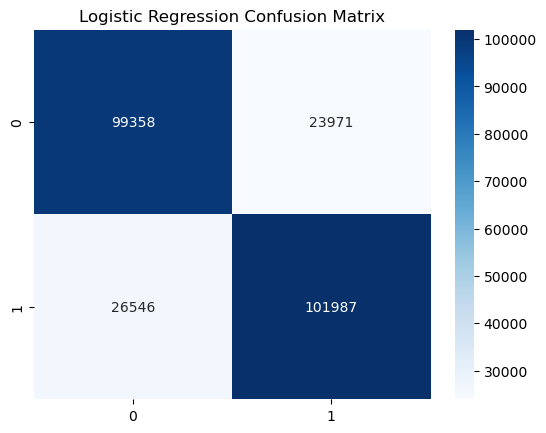

In [129]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_pred_train,y_train), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# XGBoost Classifier

In [134]:
xgb = XGBClassifier()

# Step:2 fitting the training data
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [137]:
# Prediction on training data
xgb_train_pred = xgb.predict(X_train)

# Prediction on testing data
xgb_test_pred = xgb.predict(X_test)

In [140]:
#Training Accuracy
xgb_train_accuracy = accuracy_score(xgb_train_pred,y_train)
print("Training accuracy of  XGB classifier:",xgb_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(xgb_train_pred,y_train))

Training accuracy of  XGB classifier: 93.3836783635483
Classification report of training:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93    127628
           1       0.93      0.94      0.93    124234

    accuracy                           0.93    251862
   macro avg       0.93      0.93      0.93    251862
weighted avg       0.93      0.93      0.93    251862



In [141]:
#Testing Accuracy
xgb_test_accuracy=accuracy_score(xgb_test_pred,y_test)
print("Testing accuracy of  XGB classifier:",xgb_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(xgb_test_pred,y_test))


Testing accuracy of  XGB classifier: 89.61294028274443
Classification report of training:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90     54574
           1       0.89      0.90      0.90     53368

    accuracy                           0.90    107942
   macro avg       0.90      0.90      0.90    107942
weighted avg       0.90      0.90      0.90    107942



In [143]:
# f1 score
xgb_f1_score = f1_score(xgb_test_predict,y_test)
print("F1 score of xgb:",xgb_f1_score*100)

F1 score of xgb: 89.55196063813926


* xgboost training,testing accuracy are good , f1 score is also fine

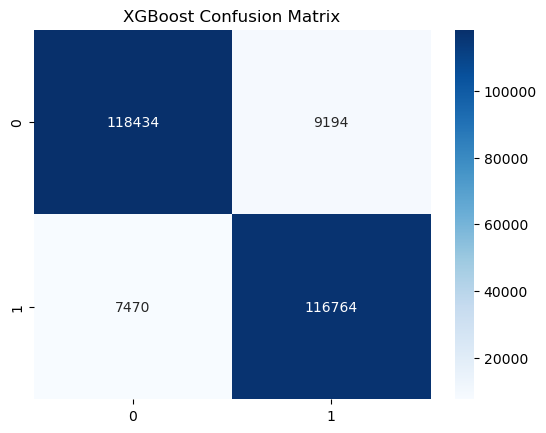

In [144]:
# Confusion Matrix
sns.heatmap(confusion_matrix(xgb_train_pred,y_train), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()


* NOTE:
  
  
  Using of HYPER PARAMETER TUNING can take lot of time because the data is huge , its a time-consuming process for this data we are having 200000 values , so we skip that 

# FINAL OBSERVATION

* Logistic regression model training and testing score is not good which are around 80%
* XGBoost classifier gave a good performance for training and testing both where training score is 93.3% and testing score is 90% with f1_score is 90%.  
* So we are selecting XGBOOST CLassifier is the best model

# MODEL SAVING

In [146]:
import pickle
file=open("XGBoost_classifier_model.pkl","wb")
pickle.dump(xgb,file)